## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_entropy : URL 복잡도
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
---
* url_ip_present : URL내 IP표시 여부
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 = 1, 'benign'은 정상사이트 = 0)
<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [12]:

#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import * 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [67]:
data = pd.read_csv('train_dataset.csv', index_col=0)
data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign


# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [68]:
data.dropna(axis = 1, inplace = True)
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
                          ..
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
Result_v1                  0
Length: 22, dtype: int64

In [69]:
data['Result_v1'] = data['Result_v1'].map({'malicious': 1, 'benign': 0})
data

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,1
3660,66.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,0
3661,90.0,1.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,1
3662,46.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,0


In [70]:
print(data.columns)
print(data.dtypes)
print(data.shape)

Index(['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'Result_v1'],
      dtype='object')
url_len                    float64
url_num_hyphens_dom        float64
url_hostname_len           float64
url_num_dots               float64
url_num_underscores        float64
                            ...   
html_num_tags('body')      float64
html_num_tags('form')      float64
html_num_tags('a')         float64
html_num_tags('applet')    float64
Result_v1                    int64
Length: 22, dtype: object
(3664, 22)


In [71]:
for i in data:
    if data[i].nunique() <= 100:
        print(i)
        print()
        print(data[i].unique())
        print(data[i].nunique())
        print(data[i].value_counts())
        print('=='*40)
        print('=='*40)

url_num_hyphens_dom

[ 0.  2.  1.  3.  4.  6.  5. 14.]
8
0.0     2734
1.0      509
2.0      315
3.0       71
4.0       26
5.0        5
6.0        3
14.0       1
Name: url_num_hyphens_dom, dtype: int64
url_hostname_len

[ 15.  17.  16.  14.  27.  18.  19.  25.  13.  23.  20.  12.  10.  34.
  24.  32.  22.  30.  28.  11.  26.  42.   9.  21.  33.  43.   8.  31.
  44.   6.  48.   7.  37.   4.  68.  29.  36.  40.  46. 101.  39.  38.
  35.  61.  47.  45.  52.  72.  55.  56.  57. 104.   5.  41.  51.  74.
  60.  49. 109.  85. 100.  54.  62.  53.  77.  63. 103.]
67
17.0     461
13.0     284
14.0     270
15.0     219
16.0     198
        ... 
109.0      1
55.0       1
72.0       1
68.0       1
103.0      1
Name: url_hostname_len, Length: 67, dtype: int64
url_num_dots

[ 2.  6.  3.  4.  1.  9.  5. 32. 10.  7.  8. 11. 13. 12. 26. 14. 16.]
17
2.0     1505
3.0      952
1.0      662
4.0      383
5.0       53
6.0       50
8.0       15
7.0       13
9.0       10
11.0       5
13.0       5
10.0       5
26

## 값이 하나만 존재하는 열과 필요없는 열들을 삭제
전체 데이터 3664건중에 특정값으로 3550건 이상 몰려있는 열들을 삭제

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 3663
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_hostname_len         3664 non-null   float64
 3   url_num_dots             3664 non-null   float64
 4   url_num_underscores      3664 non-null   float64
 5   url_query_len            3664 non-null   float64
 6   url_num_query_para       3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   url_chinese_present      3664 non-null   float64
 10  url_port                 3664 non-null   float64
 11  html_num_tags('iframe')  3664 non-null   float64
 12  html_num_tags('script')  3664 non-null   float64
 13  html_num_tags('embed')   3664 non-null   float64
 14  html_num_tags('object') 

In [19]:
delete_col = []
for i in data:
    count_0 = len(data.loc[data[i] == 0])
    print(i, ':', count_0)
    if count_0 >= 3600:
        delete_col.append(i)
print('0값이 3600개 이상 존재열 : ', delete_col)

display(data.groupby(['Result_v1'], as_index=False)[delete_col].value_counts())

data.drop(delete_col, axis = 1, inplace = True)
display(data.head())


url_len : 0
url_num_hyphens_dom : 2734
url_hostname_len : 0
url_num_dots : 0
url_num_underscores : 3206
url_query_len : 3436
url_num_query_para : 3471
url_ip_present : 3441
url_entropy : 0
url_chinese_present : 3664
url_port : 3656
html_num_tags('iframe') : 3172
html_num_tags('script') : 486
html_num_tags('embed') : 3602
html_num_tags('object') : 3579
html_num_tags('div') : 328
html_num_tags('head') : 41
html_num_tags('body') : 57
html_num_tags('form') : 1191
html_num_tags('a') : 672
html_num_tags('applet') : 3664
Result_v1 : 1858
0값이 3600개 이상 존재열 :  ['url_chinese_present', 'url_port', "html_num_tags('embed')", "html_num_tags('applet')"]


,Result_v1,url_chinese_present,url_port,html_num_tags('embed'),html_num_tags('applet'),count
0,0,0.0,0.0,0.0,0.0,1795
1,0,0.0,0.0,1.0,0.0,56
2,0,0.0,1.0,0.0,0.0,5
3,0,0.0,0.0,3.0,0.0,2
4,1,0.0,0.0,0.0,0.0,1799
5,1,0.0,0.0,1.0,0.0,4
6,1,0.0,1.0,0.0,0.0,3


,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0,0


In [20]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'Result_v1'],
      dtype='object')

In [21]:
# display(pd.DataFrame(data.loc[(data['Result_v1'] == 1) & (data[data.columns] != 0)][data.columns].count()))

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_hostname_len : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_entropy : URL 복잡도
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
---
* url_ip_present : URL내 IP표시 여부
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 = -1, 'benign'은 정상사이트 = 1)

,url_len
34.0,94
36.0,57
37.0,52
35.0,50
32.0,50


,url_len
17.0,132
18.0,74
39.0,67
26.0,54
24.0,54


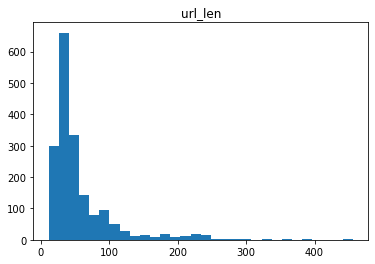

,url_num_hyphens_dom
1.0,396
2.0,265
3.0,71
4.0,26
5.0,4


,url_num_hyphens_dom
1.0,113
2.0,50
5.0,1


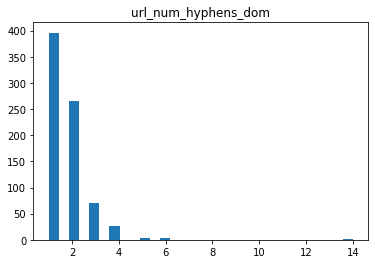

,url_hostname_len
13.0,114
17.0,110
14.0,101
22.0,88
23.0,85


,url_hostname_len
17.0,351
13.0,170
14.0,169
15.0,155
18.0,137


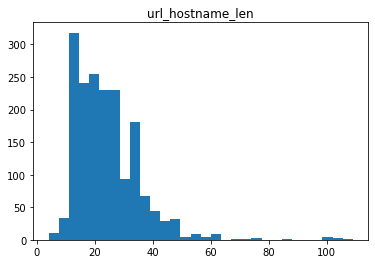

,url_num_dots
2.0,611
1.0,506
3.0,430
4.0,151
5.0,36


,url_num_dots
2.0,894
3.0,522
4.0,232
1.0,156
6.0,19


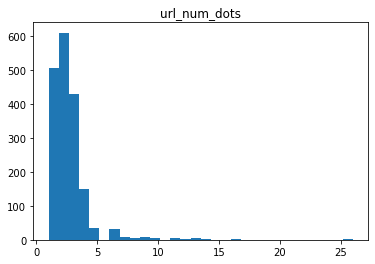

,url_num_underscores
1.0,73
2.0,19
3.0,15
6.0,2
18.0,2


,url_num_underscores
1.0,184
2.0,68
3.0,42
4.0,28
14.0,6


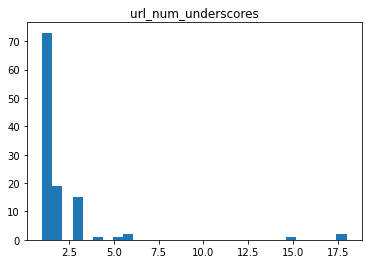

,url_query_len
41.0,50
157.0,21
5.0,12
11.0,8
44.0,6


,url_query_len


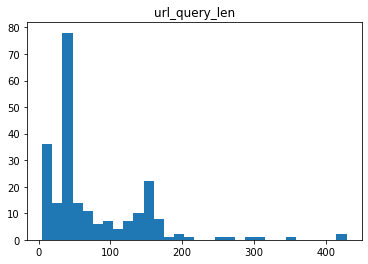

,url_num_query_para
1.0,105
2.0,41
3.0,33
6.0,5
7.0,4


,url_num_query_para


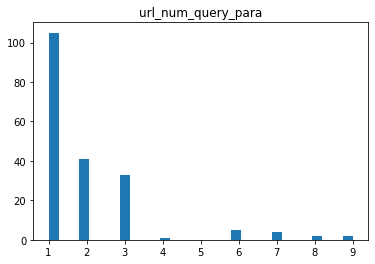

,url_ip_present
1.0,75


,url_ip_present
1.0,148


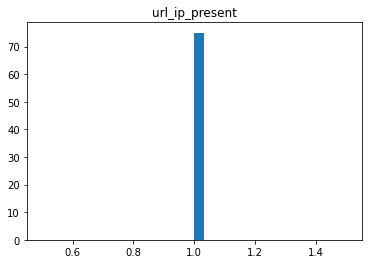

,url_entropy
4.241102,6
4.139468,5
3.945465,5
4.080415,4
3.689704,4


,url_entropy
3.970176,18
4.084963,14
4.053509,11
3.886842,11
3.973661,10


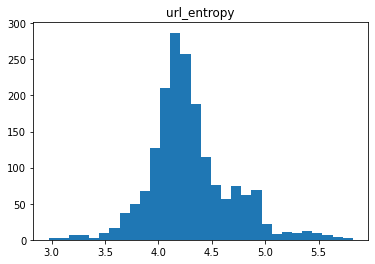

,html_num_tags('iframe')
1.0,142
3.0,34
2.0,10
5.0,4
4.0,3


,html_num_tags('iframe')
1.0,223
2.0,49
3.0,7
4.0,5
6.0,2


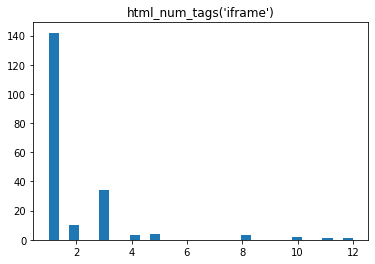

,html_num_tags('script')
2.0,557
1.0,235
3.0,140
9.0,105
5.0,82


,html_num_tags('script')
17.0,130
8.0,128
1.0,120
4.0,98
3.0,92


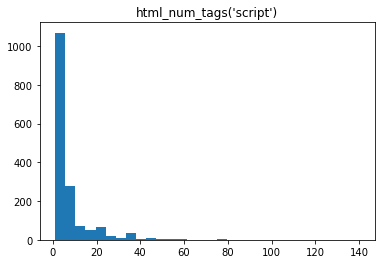

,html_num_tags('object')
1.0,7


,html_num_tags('object')
1.0,69
2.0,5
3.0,1
8.0,1
4.0,1


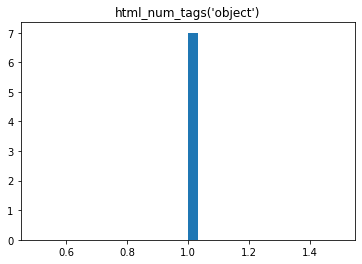

,html_num_tags('div')
41.0,288
2.0,90
8.0,72
36.0,60
88.0,50


,html_num_tags('div')
4.0,132
1.0,95
32.0,61
3.0,49
2.0,46


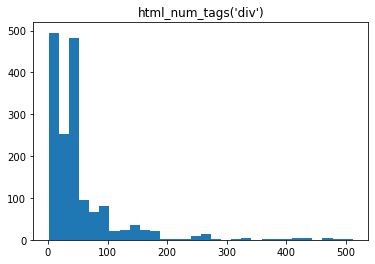

,html_num_tags('head')
1.0,1768
2.0,19
3.0,1


,html_num_tags('head')
1.0,1822
2.0,13


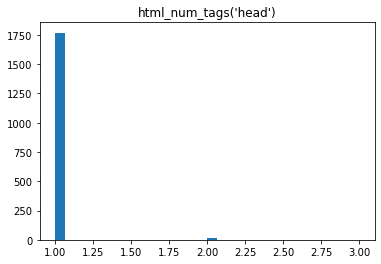

,html_num_tags('body')
1.0,1681
2.0,93
3.0,5


,html_num_tags('body')
1.0,1814
2.0,13
3.0,1


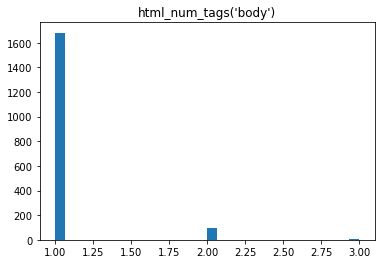

,html_num_tags('form')
1.0,1242
2.0,174
3.0,41
5.0,34
4.0,32


,html_num_tags('form')
1.0,548
2.0,259
3.0,91
4.0,17
5.0,6


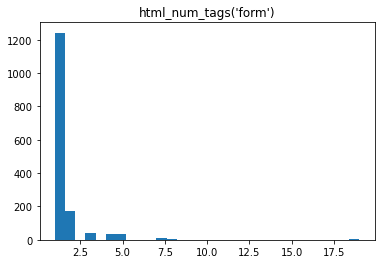

,html_num_tags('a')
16.0,199
4.0,112
15.0,111
18.0,98
1.0,85


,html_num_tags('a')
3.0,147
1.0,101
29.0,80
2.0,37
564.0,35


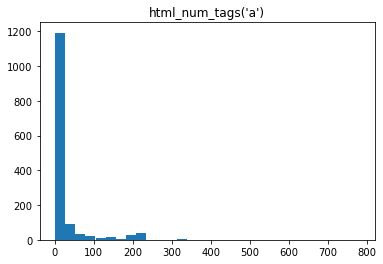

,Result_v1
1,1806


,Result_v1


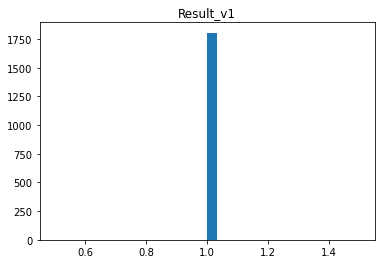

In [22]:
for i in data:
    # malicious = data.loc[data['Result_v1'] == 1, i]
    # benign = data.loc[data['Result_v1'] == 0, i]
    display(pd.DataFrame(data.loc[(data['Result_v1'] == 1) & (data[i] != 0)][i].value_counts()).sort_values(by = i, ascending = False).head())
    display(pd.DataFrame(data.loc[(data['Result_v1'] == 0) & (data[i] != 0)][i].value_counts()).sort_values(by = i, ascending = False).head())
    plt.hist(data.loc[(data['Result_v1'] == 1) & (data[i] != 0)][i], bins =30)
    plt.title(i)
    plt.show()

Ttest_indResult(statistic=0.4546127241705478, pvalue=0.6494148252056856)
----------------------------------------------------------------------------------------------------
url_len


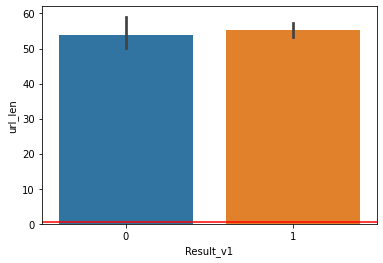

Ttest_indResult(statistic=22.906587236874817, pvalue=1.227189003485057e-108)
----------------------------------------------------------------------------------------------------
url_num_hyphens_dom


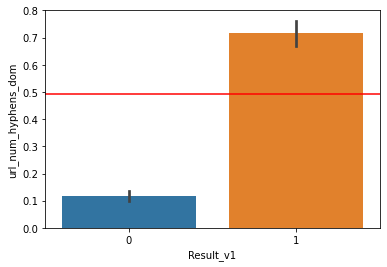

Ttest_indResult(statistic=25.064469192748557, pvalue=4.2986638320974733e-128)
----------------------------------------------------------------------------------------------------
url_hostname_len


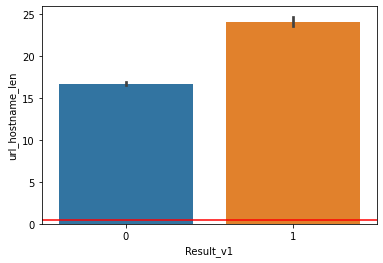

Ttest_indResult(statistic=-2.7932566314594776, pvalue=0.005245139581715304)
----------------------------------------------------------------------------------------------------
url_num_dots


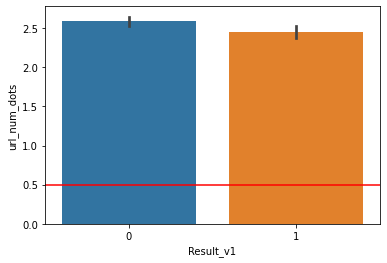

Ttest_indResult(statistic=-7.833025385817123, pvalue=6.1918086503572335e-15)
----------------------------------------------------------------------------------------------------
url_num_underscores


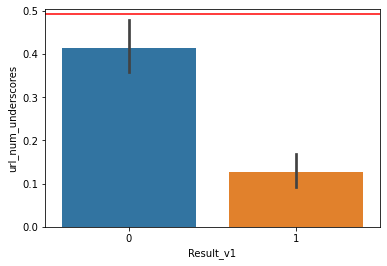

Ttest_indResult(statistic=11.623135287080077, pvalue=1.0801245463069822e-30)
----------------------------------------------------------------------------------------------------
url_query_len


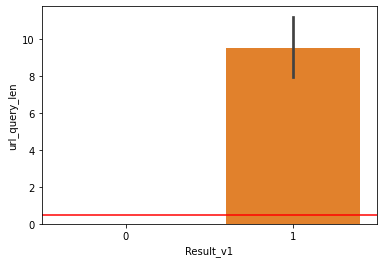

Ttest_indResult(statistic=11.337989759094699, pvalue=2.606444226848273e-29)
----------------------------------------------------------------------------------------------------
url_num_query_para


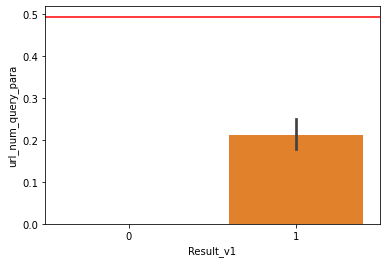

Ttest_indResult(statistic=-4.840241416410486, pvalue=1.3503457082803993e-06)
----------------------------------------------------------------------------------------------------
url_ip_present


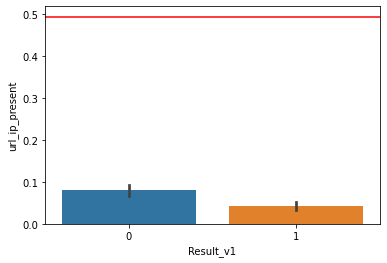

Ttest_indResult(statistic=10.16857604651035, pvalue=5.685013576113623e-24)
----------------------------------------------------------------------------------------------------
url_entropy


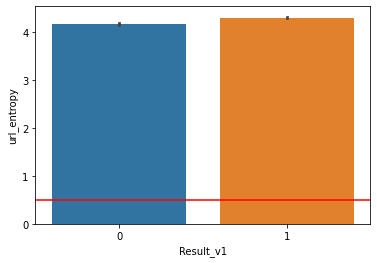

Ttest_indResult(statistic=-1.315426947740855, pvalue=0.1884488060544947)
----------------------------------------------------------------------------------------------------
html_num_tags('iframe')


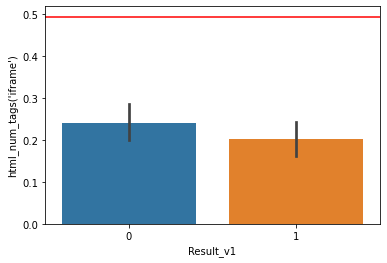

Ttest_indResult(statistic=-12.418266353148251, pvalue=1.0302512873462584e-34)
----------------------------------------------------------------------------------------------------
html_num_tags('script')


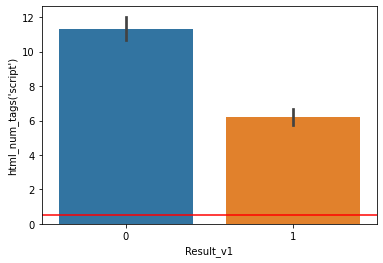

Ttest_indResult(statistic=-6.324062752866714, pvalue=2.8547633129850835e-10)
----------------------------------------------------------------------------------------------------
html_num_tags('object')


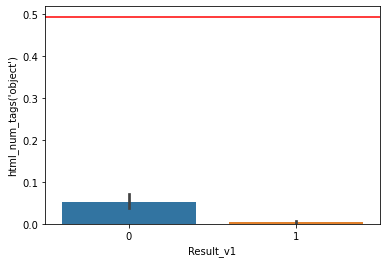

Ttest_indResult(statistic=-3.8533436782969446, pvalue=0.00011851219890773057)
----------------------------------------------------------------------------------------------------
html_num_tags('div')


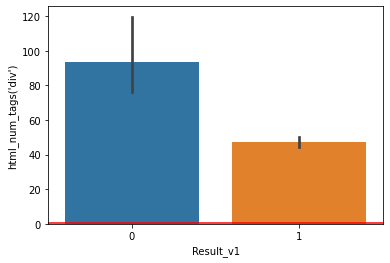

Ttest_indResult(statistic=1.470474428082834, pvalue=0.14151921971289405)
----------------------------------------------------------------------------------------------------
html_num_tags('head')


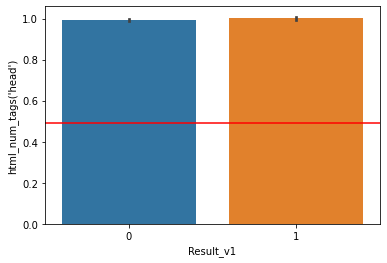

Ttest_indResult(statistic=6.777147417683993, pvalue=1.4226530236348273e-11)
----------------------------------------------------------------------------------------------------
html_num_tags('body')


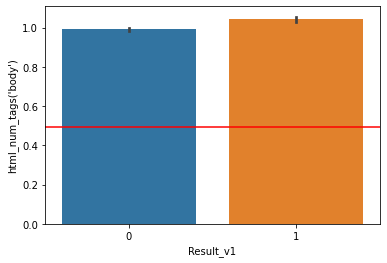

Ttest_indResult(statistic=7.487958091837151, pvalue=8.716676534863773e-14)
----------------------------------------------------------------------------------------------------
html_num_tags('form')


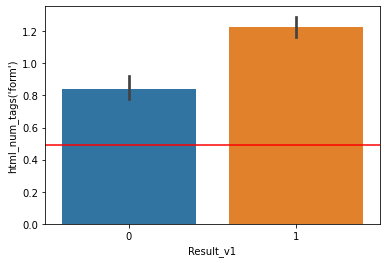

Ttest_indResult(statistic=-7.4255512060321935, pvalue=1.389595389434825e-13)
----------------------------------------------------------------------------------------------------
html_num_tags('a')


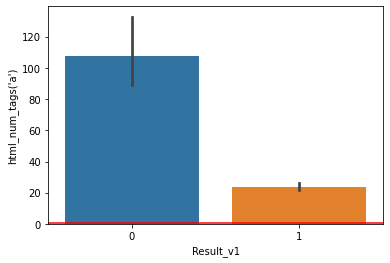

Ttest_indResult(statistic=inf, pvalue=0.0)
----------------------------------------------------------------------------------------------------
Result_v1


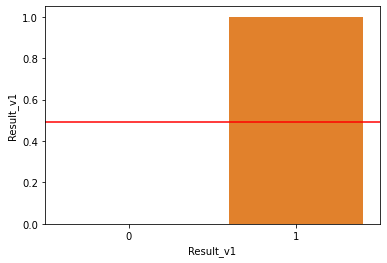

In [23]:
for i in data:
    malicious = data.loc[data['Result_v1'] == 1, i]
    benign = data.loc[data['Result_v1'] == 0, i]
    print(spst.ttest_ind(malicious, benign))
    print('--'*50)
    print(i)
    sns.barplot(x = 'Result_v1', y = i, data = data)
    plt.axhline(data['Result_v1'].mean(), color='r')
    plt.show()

## 수치가 괜찮은 친구들

- url_num_hyphens_dom (statistic=21.611468324602658, pvalue=7.450704816136977e-97)

- url_hostname_len (statistic=23.66764057856173, pvalue=2.4831847344086415e-114)

- url_num_underscores (statistic=-7.672537460263797, pvalue=2.217920239673321e-14)

- url_query_len (statistic=10.978270060909715, pvalue=1.4834949554079937e-27)

- url_num_query_para (statistic=10.667013308147133, pvalue=3.934486909081105e-26)

- url_entropy (statistic=9.340482438305928, pvalue=1.7337171490851634e-20)

- html_num_tags(script) (statistic=-11.738810968999502, pvalue=3.438162226395458e-31)

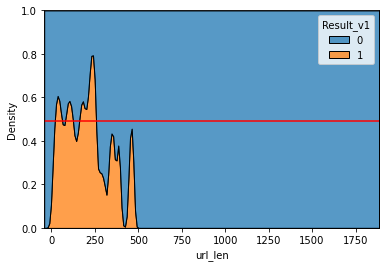

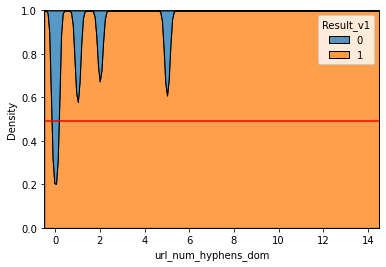

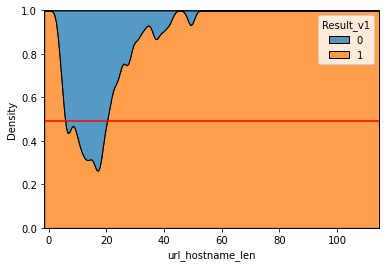

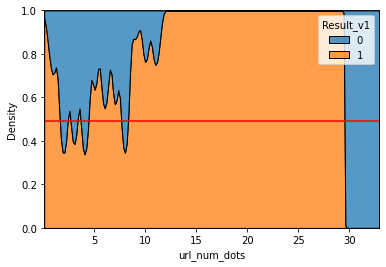

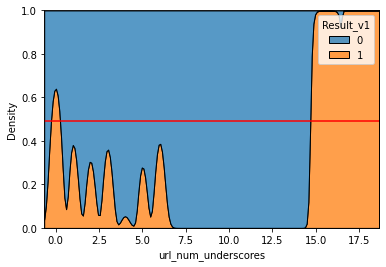

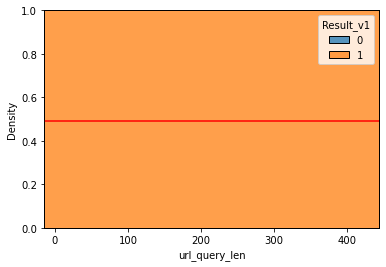

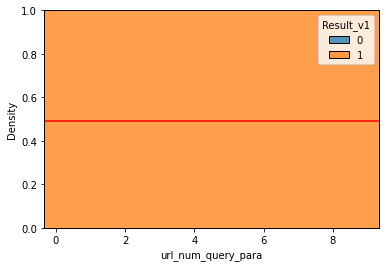

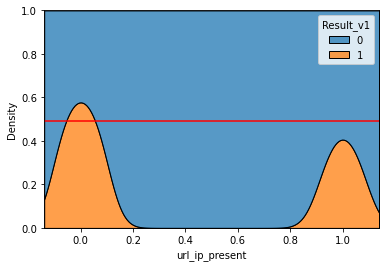

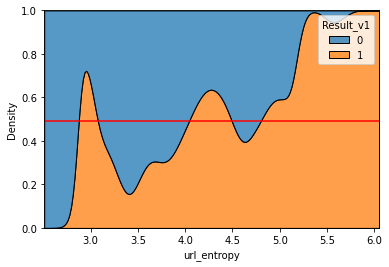

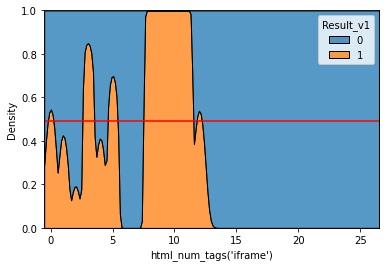

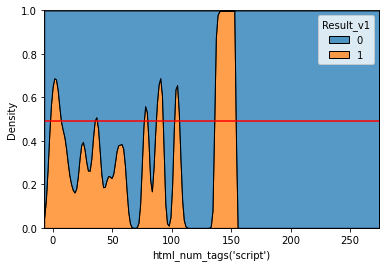

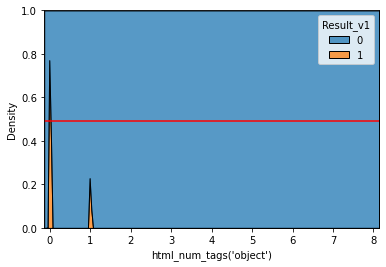

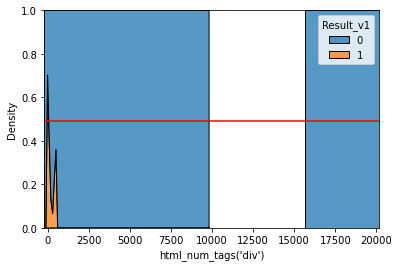

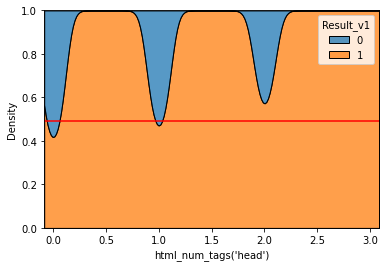

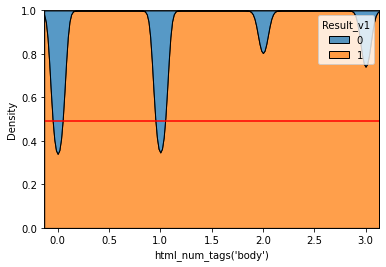

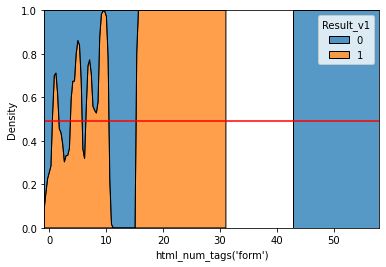

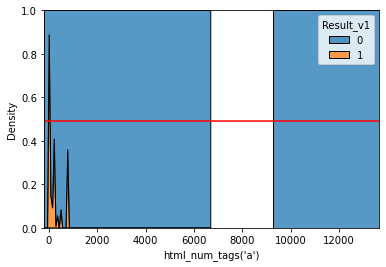

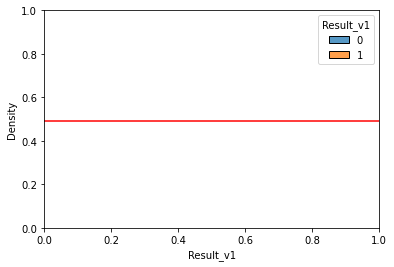

In [24]:
for i in data:
    sns.kdeplot(x = i, data = data, hue = 'Result_v1', multiple = 'fill')
    plt.axhline(data['Result_v1'].mean(), color='r')
    plt.show()

In [25]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'Result_v1'],
      dtype='object')

## 수치가 괜찮은 친구들

url_num_underscores  
url_entropy  
html_num_tags('iframe')  
html_num_tags('script')  
html_num_tags('form')

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:pink">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [26]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3664 entries, 0 to 3663
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_hostname_len         3664 non-null   float64
 3   url_num_dots             3664 non-null   float64
 4   url_num_underscores      3664 non-null   float64
 5   url_query_len            3664 non-null   float64
 6   url_num_query_para       3664 non-null   float64
 7   url_ip_present           3664 non-null   float64
 8   url_entropy              3664 non-null   float64
 9   html_num_tags('iframe')  3664 non-null   float64
 10  html_num_tags('script')  3664 non-null   float64
 11  html_num_tags('object')  3664 non-null   float64
 12  html_num_tags('div')     3664 non-null   float64
 13  html_num_tags('head')    3664 non-null   float64
 14  html_num_tags('body')   

In [27]:
# 컬럼명 변경
data.rename(columns={"html_num_tags('iframe')" : 'html_num_tags(iframe)', 
                     "html_num_tags('script')" : "html_num_tags(script)", 
                     "html_num_tags('object')" : "html_num_tags(object)", 
                     "html_num_tags('div')" : "html_num_tags(div)", 
                     "html_num_tags('head')" : "html_num_tags(head)", 
                     "html_num_tags('body')" : "html_num_tags(body)", 
                     "html_num_tags('form')" : "html_num_tags(form)", 
                     "html_num_tags('a')" : "html_num_tags(a)"}, inplace = True)
data


,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),Result_v1
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,1
3660,66.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,212.0,1.0,1.0,3.0,475.0,0
3661,90.0,1.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,13.0,0.0,75.0,1.0,1.0,2.0,103.0,1
3662,46.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0


In [28]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'html_num_tags(iframe)',
       'html_num_tags(script)', 'html_num_tags(object)', 'html_num_tags(div)',
       'html_num_tags(head)', 'html_num_tags(body)', 'html_num_tags(form)',
       'html_num_tags(a)', 'Result_v1'],
      dtype='object')

In [29]:
# 중복 데이터 제거를 제거합니다.
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
ddp = pd.DataFrame(data.duplicated())
display(ddp.value_counts())

data.drop_duplicates(keep='first', inplace=True)
data.shape

False    3231
True      433
dtype: int64

(3231, 18)

In [30]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url_len                3231 non-null   float64
 1   url_num_hyphens_dom    3231 non-null   float64
 2   url_hostname_len       3231 non-null   float64
 3   url_num_dots           3231 non-null   float64
 4   url_num_underscores    3231 non-null   float64
 5   url_query_len          3231 non-null   float64
 6   url_num_query_para     3231 non-null   float64
 7   url_ip_present         3231 non-null   float64
 8   url_entropy            3231 non-null   float64
 9   html_num_tags(iframe)  3231 non-null   float64
 10  html_num_tags(script)  3231 non-null   float64
 11  html_num_tags(object)  3231 non-null   float64
 12  html_num_tags(div)     3231 non-null   float64
 13  html_num_tags(head)    3231 non-null   float64
 14  html_num_tags(body)    3231 non-null   float64
 15  html

## ※ 남은 변수
- 숫자
    * url_len : URL 길이
    * url_num_hypens_dom : URL내 '-'(하이픈) 개수
    * url_hostname_len : URL의 hostname 길이
    * url_num_dots : URL내 '.'(닷) 개수
    * url_num_underscores : URL내 '_'(언더바) 개수
    * url_query_len : URL쿼리 길이
    * url_num_query_para : URL쿼리의 파라미터 개수
    * url_entropy : URL 복잡도
    * html_num_tags('iframe') : HTML내 'iframe' 태그 개수
    * html_num_tags('script') : HTML내 'script' 태그 개수
    * html_num_tags('object') : HTML내 'object' 태그 개수
    * html_num_tags('div') : HTML내 'div' 태그 개수
    * html_num_tags('head') : HTML내 'head' 태그 개수
    * html_num_tags('body') : HTML내 'body' 태그 개수
    * html_num_tags('form') : HTML내 'form' 태그 개수
    * html_num_tags('a') : HTML내 'a' 태그 개수
- 범주
    * url_ip_present : URL내 IP표시 여부
    * Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 = 1, 'benign'은 정상사이트 = 0)

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:skyblue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [31]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:pink">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [32]:
# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인



In [33]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.






In [34]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인




---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:pink">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [35]:
# 결축치의 존재를 확인합니다.



In [36]:
# 결측치를 적절히 처리해줍니다.




In [37]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:pink">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

## ※ 남은 변수
- 숫자
    * url_len : URL 길이
    
    * url_num_hypens_dom : URL내 '-'(하이픈) 개수

    * url_hostname_len : URL의 hostname 길이

    * url_num_dots : URL내 '.'(닷) 개수

    * url_num_underscores : URL내 '_'(언더바) 개수

    * url_query_len : URL쿼리 길이

    * url_num_query_para : URL쿼리의 파라미터 개수

    * url_entropy : URL 복잡도

    * html_num_tags('iframe') : HTML내 'iframe' 태그 개수

    * html_num_tags('script') : HTML내 'script' 태그 개수

    * html_num_tags('object') : HTML내 'object' 태그 개수

    * html_num_tags('div') : HTML내 'div' 태그 개수

    * html_num_tags('head') : HTML내 'head' 태그 개수

    * html_num_tags('body') : HTML내 'body' 태그 개수

    * html_num_tags('form') : HTML내 'form' 태그 개수

    * html_num_tags('a') : HTML내 'a' 태그 개수
- 범주
    * url_ip_present : URL내 IP표시 여부
    
    * Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트 = -1, 'benign'은 정상사이트 = 1)

https://www.google.com/search?
q <-- 파라미터  
=티스토리& <-- 인자(값)  
aqs <-- 파라미터  
=chrome.0.69i59.1186j0j7& <-- 인자(값)  
sourceid <-- 파라미터  
=chrome& <-- 인자(값)  
ie <-- 파라미터  
=UTF-8 <-- 인자(값)  

In [38]:
display(data)
print(data.info())
display(data.describe())

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),Result_v1
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,17.0,1.0,1.0,1.0,45.0,0
3658,14.0,0.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,0
3659,68.0,3.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,1
3660,66.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,212.0,1.0,1.0,3.0,475.0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 0 to 3663
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url_len                3231 non-null   float64
 1   url_num_hyphens_dom    3231 non-null   float64
 2   url_hostname_len       3231 non-null   float64
 3   url_num_dots           3231 non-null   float64
 4   url_num_underscores    3231 non-null   float64
 5   url_query_len          3231 non-null   float64
 6   url_num_query_para     3231 non-null   float64
 7   url_ip_present         3231 non-null   float64
 8   url_entropy            3231 non-null   float64
 9   html_num_tags(iframe)  3231 non-null   float64
 10  html_num_tags(script)  3231 non-null   float64
 11  html_num_tags(object)  3231 non-null   float64
 12  html_num_tags(div)     3231 non-null   float64
 13  html_num_tags(head)    3231 non-null   float64
 14  html_num_tags(body)    3231 non-null   float64
 15  html

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a),Result_v1
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,56.121944,0.421232,20.450944,2.520891,0.285361,4.984215,0.110492,0.060972,4.232582,0.216961,8.659239,0.030641,69.792943,0.998143,1.016404,0.993810,63.254101,0.499845
std,86.569208,0.861582,9.902215,1.562163,1.169914,26.287905,0.599162,0.239316,0.394697,0.918491,12.769059,0.248816,387.505363,0.142934,0.226790,1.574947,360.632590,0.500077
min,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.992151,0.000000,2.000000,0.000000,5.000000,1.000000,1.000000,0.000000,2.000000,0.000000
50%,36.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.195816,0.000000,4.000000,0.000000,32.000000,1.000000,1.000000,1.000000,15.000000,0.000000
75%,57.000000,1.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.470114,0.000000,12.000000,0.000000,60.000000,1.000000,1.000000,1.000000,49.000000,1.000000
max,1837.000000,14.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,26.000000,267.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,1.000000


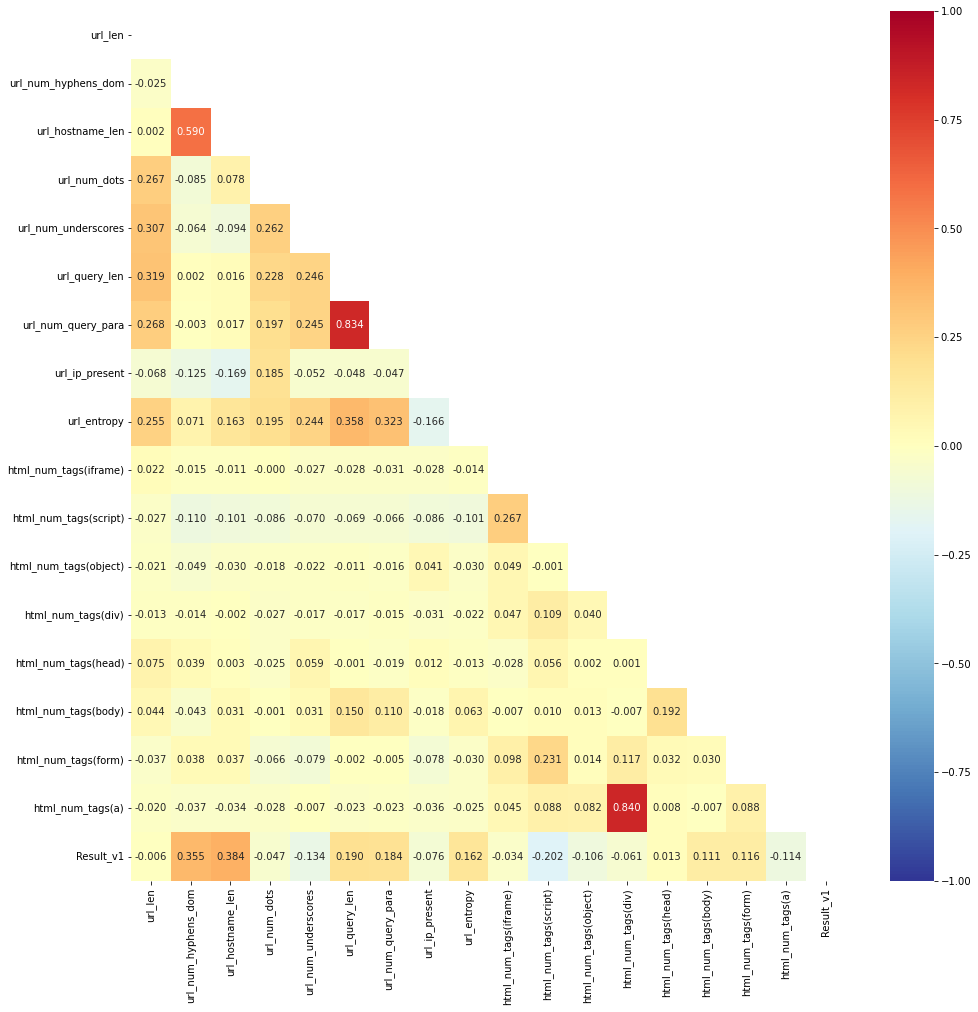

In [39]:
# temp1 = data.groupby(['Embarked', 'Pclass'], as_index = False)['PassengerId'].count()
# temp2 = temp1.pivot('Embarked', 'Pclass','PassengerId')
# display(temp2)

plt.figure(figsize = (16, 16))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), annot = True, fmt = '.3f', mask = mask, cmap = 'RdYlBu_r',  vmin = -1, vmax = 1) # fmt는 e+05로 표시되는거 바꿔줌
plt.show()

변수끼리의 상관관계 분석

url_hostname_len, url_num_hyphens_dom : 0.590 (호스트네임이 길면 하이픈이 많음)

url_num_underscores, url_len : 0.307 (언더바가 많으면 url이 김)

url_query_len, url_len : 0.319 (쿼리가 길면 url이 김)

url_num_query_para, url_query_len : 0.834 (쿼리의 파라미터 개수가 많아지면 당연히 쿼리도 길어짐)

html_num_tags(a), html_num_tags(div) : 0.840 (html에서 a가 많아지면 div도 같이 많아짐, 같이 쓰인다는거 같음)

결과랑 가장 연관이 큰거

url_entropy

html_num_tags(script)

In [58]:
# data['query_len/query_para_(one_para_len)'] = data['url_query_len'] / data['url_num_query_para']
# data = data.replace([np.inf, -np.inf], 100)
# data = data.fillna(0)
# data.isna().sum()
# display(data.head())
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
columns_a = list(data.columns)
print(data.shape)
bbb = []
ccc = []
ddd = []
eee = []
for i in columns_a:
    data_a1 = data.groupby(['Result_v1'], as_index=False)[i].value_counts()
    data_a2 = data_a1.loc[(data_a1['Result_v1'] == 1) & (data_a1[i] != 0)]['count'].sum()
    data_a4 = data_a1.loc[(data_a1['Result_v1'] == 0) & (data_a1[i] != 0)]['count'].sum()
    data_a5 = data_a1.loc[(data_a1['Result_v1'] == 0) & (data_a1[i] != 0)]['count'].sum()
    bbb.append(round((data_a2*100)/data.shape[0]))
    ccc.append(data_a2)
    ddd.append(data_a5)
    eee.append(data_a4)
dict = {'name' : columns_a, 'result==1,data!=0,count' : ccc, 'value%' : bbb, 'result==0,data!=0,count' : ddd}
display(pd.DataFrame(dict).sort_values(by = ['value%'], ascending=False))
# display(data.groupby(['Result_v1'], as_index=False)[data.columns].value_counts())
display(pd.DataFrame(dict).sort_values(by = ['result==0,data!=0,count'], ascending=False))

(3231, 18)


,name,"result==1,data!=0,count",value%,"result==0,data!=0,count"
0,url_len,1615,50,1616
3,url_num_dots,1615,50,1616
8,url_entropy,1615,50,1616
17,Result_v1,1615,50,0
2,url_hostname_len,1615,50,1616
13,html_num_tags(head),1598,49,1598
14,html_num_tags(body),1591,49,1589
12,html_num_tags(div),1477,46,1451
10,html_num_tags(script),1447,45,1348
15,html_num_tags(form),1369,42,776


,name,"result==1,data!=0,count",value%,"result==0,data!=0,count"
0,url_len,1615,50,1616
2,url_hostname_len,1615,50,1616
3,url_num_dots,1615,50,1616
8,url_entropy,1615,50,1616
13,html_num_tags(head),1598,49,1598
14,html_num_tags(body),1591,49,1589
12,html_num_tags(div),1477,46,1451
10,html_num_tags(script),1447,45,1348
16,html_num_tags(a),1293,40,1337
15,html_num_tags(form),1369,42,776


In [41]:
# sns.kdeplot(x = 'query_len/query_para_(one_para_len)', data = data, hue = 'Result_v1', multiple = 'fill') # 쿼리의 길이나 쿼리의 개수가 둘다 0이 아니면 악성사이트일 확률이 매우 높음
# plt.axhline(data['Result_v1'].mean(), color='r')
# plt.show()

In [42]:
# print(data.loc[data['query_len/query_para_(one_para_len)'] > 0].count())
# print(data.loc[data['query_len/query_para_(one_para_len)'] > 0].count())
# print(data.loc[data['query_len/query_para_(one_para_len)'] > 0].count())
# print(data.loc[data['query_len/query_para_(one_para_len)'] > 0].count())
# print(data.loc[data['query_len/query_para_(one_para_len)'] > 0].count())

In [43]:
# pd.set_option('display.max_row', 500)
# pd.set_option('display.max_columns', 100)
# data.loc[data['query_len/query_para_(one_para_len)'] != 0]

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
data.loc[data['url_num_hyphens_dom'] != 0]

print(data.shape)

(3231, 18)


---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:pink">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [44]:
target = 'Result_v1'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [45]:
display(x, y)

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a)
0,23.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0
1,75.0,0.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,20.0,1.0,1.0,0.0,21.0
2,20.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,101.0,1.0,1.0,3.0,70.0
3,27.0,0.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,151.0,1.0,1.0,1.0,55.0
4,39.0,2.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,332.0,1.0,1.0,0.0,321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,42.0,0.0,21.0,1.0,0.0,0.0,0.0,0.0,4.148415,0.0,63.0,0.0,17.0,1.0,1.0,1.0,45.0
3658,14.0,0.0,14.0,3.0,0.0,0.0,0.0,1.0,3.499228,0.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0
3659,68.0,3.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0
3660,66.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,212.0,1.0,1.0,3.0,475.0


0       1
1       0
2       0
3       0
4       0
       ..
3657    0
3658    0
3659    1
3660    0
3663    0
Name: Result_v1, Length: 3231, dtype: int64

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)
display(x_train, x_val, x_test)

,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a)
82,17.0,0.0,14.0,3.0,0.0,0.0,0.0,1.0,3.522055,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
440,233.0,0.0,7.0,2.0,3.0,0.0,0.0,0.0,4.483338,0.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0
3037,97.0,0.0,17.0,4.0,0.0,0.0,0.0,0.0,4.920318,0.0,5.0,0.0,12.0,1.0,1.0,1.0,3.0
951,46.0,2.0,36.0,3.0,0.0,0.0,0.0,0.0,4.411752,0.0,2.0,0.0,41.0,1.0,1.0,1.0,16.0
474,58.0,0.0,10.0,2.0,0.0,0.0,0.0,0.0,4.238859,0.0,3.0,0.0,10.0,1.0,1.0,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,15.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,3.913977,0.0,9.0,0.0,57.0,1.0,1.0,0.0,10.0
1436,15.0,0.0,14.0,2.0,0.0,0.0,0.0,0.0,3.788755,0.0,3.0,0.0,34.0,1.0,0.0,1.0,11.0
2001,41.0,0.0,15.0,3.0,0.0,0.0,0.0,0.0,4.589662,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2172,97.0,1.0,11.0,1.0,0.0,0.0,0.0,0.0,4.914799,0.0,2.0,0.0,24.0,1.0,1.0,0.0,5.0


,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a)
1254,48.0,2.0,37.0,2.0,0.0,0.0,0.0,0.0,4.685639,0.0,28.0,0.0,42.0,1.0,1.0,3.0,65.0
1688,181.0,1.0,16.0,4.0,3.0,0.0,0.0,0.0,4.669276,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2757,11.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,3.260828,0.0,6.0,0.0,42.0,1.0,1.0,0.0,27.0
1030,34.0,0.0,24.0,3.0,0.0,0.0,0.0,0.0,4.236857,0.0,3.0,0.0,13.0,1.0,1.0,1.0,4.0
2475,186.0,0.0,7.0,2.0,1.0,0.0,0.0,0.0,4.489003,0.0,3.0,0.0,3.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,84.0,1.0,63.0,13.0,0.0,0.0,0.0,0.0,4.125947,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1241,21.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,4.208966,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
3620,84.0,0.0,13.0,2.0,2.0,0.0,0.0,0.0,4.869228,0.0,24.0,0.0,358.0,1.0,1.0,1.0,514.0
1032,56.0,0.0,13.0,3.0,1.0,0.0,0.0,0.0,4.588646,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0


,url_len,url_num_hyphens_dom,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,html_num_tags(iframe),html_num_tags(script),html_num_tags(object),html_num_tags(div),html_num_tags(head),html_num_tags(body),html_num_tags(form),html_num_tags(a)
366,33.0,3.0,32.0,2.0,0.0,0.0,0.0,0.0,3.858695,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1039,47.0,2.0,37.0,3.0,0.0,0.0,0.0,0.0,4.395923,0.0,2.0,0.0,41.0,1.0,1.0,1.0,16.0
2183,29.0,2.0,28.0,1.0,0.0,0.0,0.0,0.0,4.308271,0.0,24.0,0.0,174.0,1.0,1.0,5.0,219.0
3099,17.0,0.0,17.0,2.0,0.0,0.0,0.0,0.0,3.855389,0.0,15.0,0.0,59.0,1.0,1.0,0.0,36.0
2189,18.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,3.673270,0.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,17.0,0.0,17.0,2.0,0.0,0.0,0.0,0.0,3.653661,0.0,52.0,0.0,94.0,1.0,1.0,1.0,47.0
3074,34.0,0.0,17.0,1.0,0.0,0.0,0.0,0.0,4.272804,0.0,9.0,0.0,8.0,1.0,1.0,1.0,4.0
3073,24.0,0.0,17.0,2.0,0.0,0.0,0.0,0.0,3.889050,0.0,8.0,0.0,31.0,1.0,1.0,1.0,374.0
2775,18.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,4.132944,0.0,29.0,0.0,226.0,1.0,1.0,0.0,58.0
